# Ficha 4

In [1]:
# Miguel Saraiva Grilo
# 58387                            #IACD

In [2]:
import os
print('O ficheiro está na pasta: ', os.getcwd())
import datetime
date = datetime.datetime.now()
print( "Hoje: {:%d/%m/%Y %H:%M:%S\n}".format(date))

O ficheiro está na pasta:  /home/miguelgrilo/UNI-L58387-IACD/S2-LME/Estudos
Hoje: 20/04/2024 00:27:09



### Recorde que deve:

* <u>**Explorar**</u> a informação que pode encontrar na página 
https://docs.sympy.org/latest/index.html para recordar a descrição e operacionalidades de 
comandos.

* <u>**Recorrer**</u> sempre que necessário ao 
[tutorial](https://docs.sympy.org/latest/tutorial/index.html#tutorial).

* Utilizar o ***help*** para uma consulta rápida sobre sintaxe dos comandos.

* Utilizar o ***dir*** para uma consulta rápida sobre as classes e os comandos da biblioteca.

* Visitar o site http://www.python.org para obter informação adicional, demonstrações e suporte sobre a linguagem *Python*. 

* Visitar o site https://jupyter.org para informações sobre o interpretador *Jupyter*. 

## SymPy  (continuação)

Resolva todos os exercícios usando a biblioteca Sympy


### Importe a biblioteca


In [3]:
import sympy as sp

# ============================================

### Exercício 1  

Considere as seguintes funções:

- $y = sin(x)$    no intervalo [-$\pi/2$, $\pi/2$]
- $y = x^2-1$     no intervalo [0, 2]


1. Calcule as funções inversas destas funções.

2. Para cada uma destas funções, esboce os gráficos da função com uma linha azul, da sua inversa com uma linha verde e da função $y=x$ com uma linha preta, no mesmo referêncial. 
![](http://home.uevora.pt/~bushen/LabMat/21Ficha2-1.png)

3. Repita o item 2, introduzindo as opções do plot
* title = 'string'
* xlabel ='string'
* ylabel ='string'
* legend = boolean
* xlim = (xmin,xmax)
* ylim = (ymin,ymax)
* size = (largura, altura) # (width,height)
<!--*  aspect_ratio = (float,float) -->




In [4]:
#Alínea 1
x, y=sp.symbols('x y')
def a(x):
    return (sp.sin(x))
def inversa_a(x):
    return (sp.solve(a(x)-y, x))
def b(x):
    return (x**2 - 1)
def inversa_b(x):
    return (sp.solve(b(x)-y, x))
display(inversa_a(x))
display(inversa_b(x))

[pi - asin(y), asin(y)]

[-sqrt(y + 1), sqrt(y + 1)]

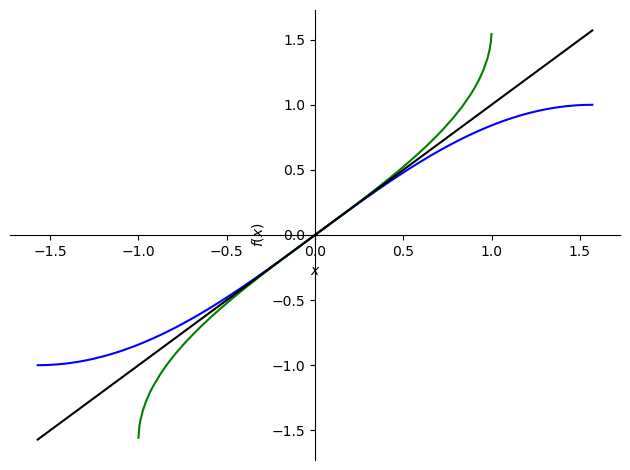

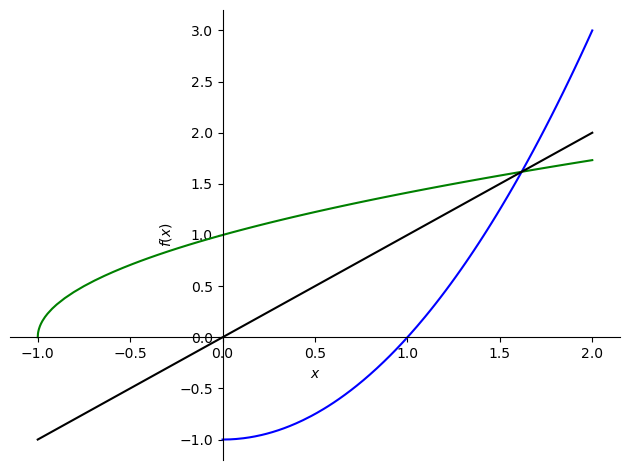

In [5]:
# Alínea 2
g1=sp.plot(a(x), (x, -sp.pi/2, sp.pi/2), show=False, line_color='blue')
###inversa de a(x)=sp.asin(x), esta operação tem de ser inserida manualmente
g2=sp.plot(sp.asin(x), (x, -sp.pi/2, sp.pi/2), show=False, line_color='green')
yx1=sp.plot(x, (x, -sp.pi/2, sp.pi/2), show=False, line_color='black')
g1.append(g2[0])
g1.append(yx1[0])
g1.show()

g3=sp.plot(b(x), (x, 0, 2), show=False, line_color='blue')
###inversa de b(x)=sp.sqrt(x+1), esta operação tem de ser inserida manualmente
g4=sp.plot(sp.sqrt(x+1), (x, -1, 2), show=False, line_color='green')
yx2=sp.plot(x, (x, -1, 2), show=False, line_color='black')
g3.append(g4[0])
g3.append(yx2[0])
g3.show()

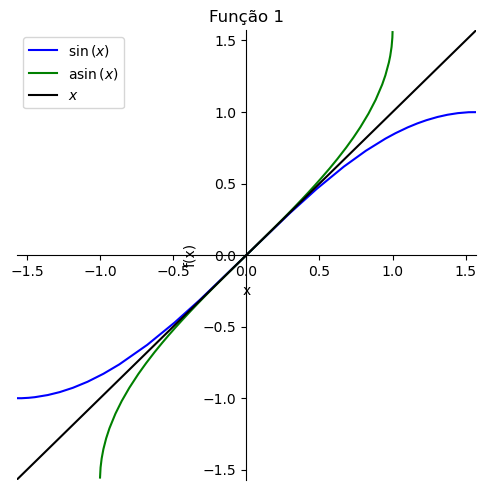

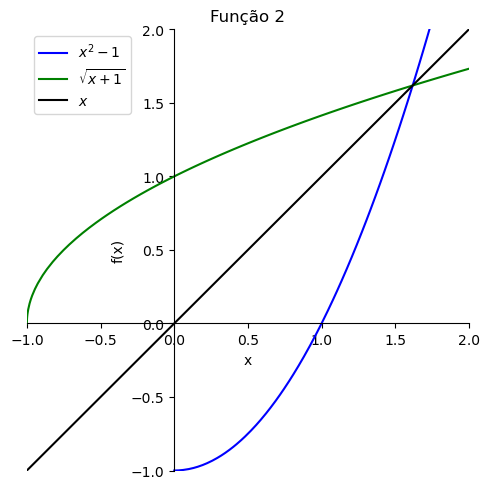

In [6]:
#Alínea 3
g1=sp.plot(a(x), xlim=(-sp.pi/2, sp.pi/2), ylim=(-sp.pi/2, sp.pi/2), legend=True, size=(5,5), xlabel='x', ylabel='f(x)', title='Função 1', show=False, line_color='blue')       
###inversa de a(x)=sp.asin(x), esta operação tem de ser inserida manualmente
g2=sp.plot(sp.asin(x), (x, -sp.pi/2, sp.pi/2), show=False, line_color='green')
yx1=sp.plot(x, (x, -sp.pi/2, sp.pi/2), show=False, line_color='black')
g1.append(g2[0])
g1.append(yx1[0])
g1.show()

g3=sp.plot(b(x), (x, 0, 2), xlim=(-1, 2), ylim=(-1,2), legend=True, size=(5,5), xlabel='x', ylabel='f(x)', title='Função 2', show=False, line_color='blue')
###inversa de b(x)=sp.sqrt(x+1), esta operação tem de ser inserida manualmente
g4=sp.plot(sp.sqrt(x+1), (x, -1, 2), show=False, line_color='green')
yx2=sp.plot(x, (x, -1, 2), show=False, line_color='black')
g3.append(g4[0])
g3.append(yx2[0])
g3.show()

# ============================================

### Exercício 2 

Considere o sistema linear

$\left \{ 
\begin{array}{c}
x_{1}-2x_{4}=1  \\ 
-x_{3}-x_{4}=2 \\
x_{2}-x_{4}=3 \\
x_{1}+x_{4}=4 %
\end{array}%
.\right. $

1. Resolva-o usando a função `solve`.   

2. Crie a matriz `A` dos coeficientes do sistema e o vetor `b` dos termos independentes.

3. Resolva o sistema tendo em conta que $\quad x=A^{-1}b$.

4. Encontre o valor da incógnita $x_{3}$ pela regra de Cramer.
   
   
   **Observação:** 

>Considere que a matriz $A_j$ é a matriz obtida pela troca da coluna $j$ da matriz $A$ pelo vector $b$. A componente $x_j$ do vector solução $x$ é definida por $\displaystyle x_j=\frac{\det(A_j)}{\det(A)}$.



5. Determine os valores próprios, a sua multiplicidade e os vectores próprios associados a cada um, da matriz $A$, isto é, interprete o output obtido.



In [7]:
#Alínea 1
x1, x2, x3, x4=sp.symbols('x1 x2 x3 x4')
eq1=x1-2*x4-1
eq2=-x3-x4-2
eq3=x2-x4-3
eq4=x1+x4-4
print(sp.solve((eq1, eq2, eq3, eq4), (x1, x2, x3, x4)))

{x1: 3, x2: 4, x3: -3, x4: 1}


In [8]:
#Alínea 2
coeficientes=[[1, 0, 0, -2], [0, 0, -1, -1], [0, 1, 0, -1], [1, 0, 0, 1]]
A=sp.Matrix(coeficientes)
independentes=[[1], [2], [3], [4]]
b=sp.Matrix(independentes)
display(A, b)

Matrix([
[1, 0,  0, -2],
[0, 0, -1, -1],
[0, 1,  0, -1],
[1, 0,  0,  1]])

Matrix([
[1],
[2],
[3],
[4]])

In [9]:
#Alínea 3
x=A.inv()*b
display(x)

Matrix([
[ 3],
[ 4],
[-3],
[ 1]])

In [10]:
#Alínea 4
A3=A.copy()
A3[:,2]=independentes
x3=A3.det()/A.det()
print(x3)

-3


In [11]:
#Alínea 5
valores_proprios=A.eigenvals()
vetores_proprios=A.eigenvects()
for valores_proprios, multiplicidade, vetores_proprios in vetores_proprios:
    print(f"\nValor próprio: {valores_proprios}, Multiplicidade: {multiplicidade}")
    print(f"Vetor próprio:\n{vetores_proprios}\n")


Valor próprio: -I, Multiplicidade: 1
Vetor próprio:
[Matrix([
[ 0],
[-I],
[ 1],
[ 0]])]


Valor próprio: I, Multiplicidade: 1
Vetor próprio:
[Matrix([
[0],
[I],
[1],
[0]])]


Valor próprio: 1 - sqrt(2)*I, Multiplicidade: 1
Vetor próprio:
[Matrix([
[        -sqrt(2)*I],
[              -1/2],
[-1/2 - sqrt(2)*I/2],
[                 1]])]


Valor próprio: 1 + sqrt(2)*I, Multiplicidade: 1
Vetor próprio:
[Matrix([
[         sqrt(2)*I],
[              -1/2],
[-1/2 + sqrt(2)*I/2],
[                 1]])]



# ============================================

### Os mínimos e máximos de funções de várias variáveis usando as condições necessárias e suficientes de extremos


Seja  $f(x) = f(x_1,x_2,...,x_n)$ uma função de n variáveis $x_1,x_2,...,x_n$,   
o vetor gradiente  $\nabla f(x)=\left[ 
\begin{array}{c}
\frac{\partial f}{\partial x_{1}} \\ 
\frac{\partial f}{\partial x_{2}} \\ 
... \\ 
\frac{\partial f}{\partial x_{n}}%
\end{array}%
\right] ,$ 

e a matriz hessiana

$H(x)=\left[ 
\begin{array}{cccc}
\frac{\partial ^{2}f}{\partial x_{1}^{2}} & \frac{\partial ^{2}f}{\partial
x_{1}\partial x_{2}} & ... & \frac{\partial ^{2}f}{\partial x_{1}\partial
x_{n}} \\ 
\frac{\partial ^{2}f}{\partial x_{2}\partial x_{1}} & \frac{\partial ^{2}f}{%
\partial x_{2}^{2}} & ... & \frac{\partial ^{2}f}{\partial x_{2}\partial
x_{n}} \\ 
... & ... & ... & ... \\ 
\frac{\partial ^{2}f}{\partial x_{n}\partial x_{1}} & \frac{\partial ^{2}f}{%
\partial x_{n}\partial x_{2}} &  & \frac{\partial ^{2}f}{\partial x_{n}^{2}}%
\end{array}%
\right].$ 

***Pontos estacionários:***

Os pontos que verificam a igualdade
$\nabla f(x)=0,\space$
i.e. 
$\space \left \{ 
\begin{array}{c}
\frac{\partial f(x)}{\partial x_{1}}=0 \\ 
\frac{\partial f(x)}{\partial x_{2}}=0 \\ 
... \\ 
\frac{\partial f(x)}{\partial x_{n}}=0%
\end{array}%
\right. $,

chamam-se os *estacionários*.

***Condições necessárias do extremo:***

Os pontos extremos (mínimo e máximo) são pontos estacionários, i.e., verificam $\nabla f(x)=0$. A inversa não é verdadeira.

***Condições suficientes do extremo:***

Seja $P^*=(x_1^*,x_2^*,...,x_n^*)$ um ponto estacionário, e 

$H(P^{\ast })=\left[ 
\begin{array}{cccc}
H_{11} & H_{12} & ... & H_{1n} \\ 
H_{21} & H_{22} & ... & H_{2n} \\ 
... & ... & ... & ... \\ 
H_{n1} & H_{n2} & ... & H_{nn}%
\end{array}%
\right] $. 

Se a matriz $H(P^{\ast })>0$, i.e. é definida positiva, o ponto $P^{\ast }$ é o do *mínimo* de $f(x)$.

Se a matriz $H(P^{\ast })<0$, i.e. é definida negativa, o ponto $P^{\ast }$ é o do *máximo* de $f(x)$.

***Critério de Sylvester:***

Permite classificar uma matriz (definida positiva, definida negativa, não definida, etc).

Sejam $\Delta _{1}=\det \left[ H_{11}\right] ,$ $\Delta _{2}=\det \left[ 
\begin{array}{cc}
H_{11} & H_{12} \\ 
H_{21} & H_{22}%
\end{array}%
\right] ,...,$ $\Delta _{n}=\det \left[ 
\begin{array}{cccc}
H_{11} & H_{12} & ... & H_{1n} \\ 
H_{21} & H_{22} & ... & H_{2n} \\ 
... & ... & ... & ... \\ 
H_{n1} & H_{n2} & ... & H_{nn}%
\end{array}%
\right] $ 
os menores principais da matriz $H(P^{\ast })$. 

Se todos os menores principais $\Delta _{1}$, $\Delta _{2}$,...,$\Delta _{n}$ são positivos, a matriz $H(P^{\ast })$ é *definida positiva*.

Se todos os menores principais ímpares (i.e. $\Delta _{1}$, $\Delta _{3}$,...) são negativos e os menores principais pares (i.e. $\Delta _{2}$, $\Delta _{4}$,...) são positivos, a matriz $H(P^{\ast })$ é *definida negativa*. 


# ============================================

### Exercício 3 

Considere a função   
$$f(𝑥_1, x_2,x_3) = 𝑥_1^{2} + 3x_2^2 + x_2 + x_3^3 -x_3 + 5$$.   

2. Encontre os pontos estacionários de $f$.

In [12]:
x1,x2,x3=sp.symbols('x1 x2 x3')
def f(x1,x2,x3):
    return (x1**2+3*x2**2+x2+x3**3-x3+5)
dfdx1=sp.diff(f(x1,x2,x3),x1)
dfdx2=sp.diff(f(x1,x2,x3),x2)
dfdx3=sp.diff(f(x1,x2,x3),x3)
print(sp.solve([dfdx1, dfdx2, dfdx3], (x1,x2,x3)))

[(0, -1/6, -sqrt(3)/3), (0, -1/6, sqrt(3)/3)]


# ============================================

### Exercício 4 

Considere a função   $f(𝑥) = (x_1^2 + x_2 -11)^2  + (x_1 + x_2^2 -7)^2$

1. Crie o ponto ($x_1, x_2)=(2,3)$ na forma de um dicionário.    
   Avalie a função $f(x)$ no ponto ($x_1, x_2)=(2,3)$ 
 
 
2. Calcule o vetor gradiente $\nabla f(x)$ para esta função.  Avalie-o no ponto $(x_1, x_2)=(2,3)$ e verifique se pode ser o extremo da função.   


3. Calcule a matriz hessiana $H(x)$ para esta função. Determine o seu valor no ponto $(x_1, x_2)=(2,3)$.   
Determine se, no ponto indicado, a matriz hessiana é definida positiva.   


4. Determine os valores próprios da matriz obtida no item anterior.


5. Esboce o gráfico de $f$. Use argumentos opcionais para facilitar a leitura do gráfico. 


In [13]:
#Alínea 1
x1,x2=sp.symbols('x1 x2')
ponto=sp.Dict({x1:2, x2:3})
def f(x1,x2):
    return ((x1**2+x2-11)**2+(x1+x2**2-7)**2)
print(f(x1,x2).subs(ponto))

32


In [14]:
#Alínea 2
def dfdx1(x1,x2):
    return (sp.diff(f(x1,x2),x1))
def dfdx2(x1,x2):
    return (sp.diff(f(x1,x2),x2))
def gradiente(x1,x2):
    return [dfdx1(x1,x2),dfdx2(x1,x2)]
print(gradiente(x1,x2))
def gradiente_manual(x1,x2):
    return [4*x1*(x1**2 + x2 - 11) + 2*x1 + 2*x2**2 - 14, 2*x1**2 + 4*x2*(x1 + x2**2 - 7) + 2*x2 - 22]
def gradiente_ponto(x1,x2):
    return (gradiente_manual(2,3))
print(gradiente_ponto(x1,x2))
extremo=all([gradiente_ponto(x1,x2) == 0])
if extremo:
    print("Pode ser extremo")
else:
    print("Não pode ser extremo")

[4*x1*(x1**2 + x2 - 11) + 2*x1 + 2*x2**2 - 14, 2*x1**2 + 4*x2*(x1 + x2**2 - 7) + 2*x2 - 22]
[-24, 40]
Não pode ser extremo


In [15]:
#Alínea 3
def d2f_dx1dx1(x1,x2):
    return (sp.diff(f(x1,x2),x1,x1))
def d2f_dx1dx2(x1,x2):
    return (sp.diff(f(x1,x2),x1,x2))
def d2f_dx2dx1(x1,x2):
    return (sp.diff(f(x1,x2),x2,x1))
def d2f_dx2dx2(x1,x2):
    return (sp.diff(f(x1,x2),x2,x2))
def H(x1,x2):
    return (sp.Matrix([[d2f_dx1dx1(x1,x2), d2f_dx1dx2(x1,x2)],[d2f_dx2dx1(x1,x2), d2f_dx2dx2(x1,x2)]]))
print(H(x1,x2))
def H_manual(x1,x2):
    return (sp.Matrix([[2*(6*x1**2 + 2*x2 - 21), 4*(x1 + x2)], [4*(x1 + x2), 2*(2*x1 + 6*x2**2 - 13)]]))
print(H_manual(2,3))
valores_proprios=H_manual(2,3).eigenvals()
positiva=all(valores>0 for valores in valores_proprios)
if positiva:
    print("Definida positiva")
else:
    print("Não definida positiva")

Matrix([[2*(6*x1**2 + 2*x2 - 21), 4*(x1 + x2)], [4*(x1 + x2), 2*(2*x1 + 6*x2**2 - 13)]])
Matrix([[18, 20], [20, 90]])
Definida positiva


In [16]:
#Alínea 4
#valores_proprios_matrix=
###print(H_manual(x1,x2).eigenvals())
###OU
print(H_manual(2,3).eigenvals())

{54 - 4*sqrt(106): 1, 4*sqrt(106) + 54: 1}


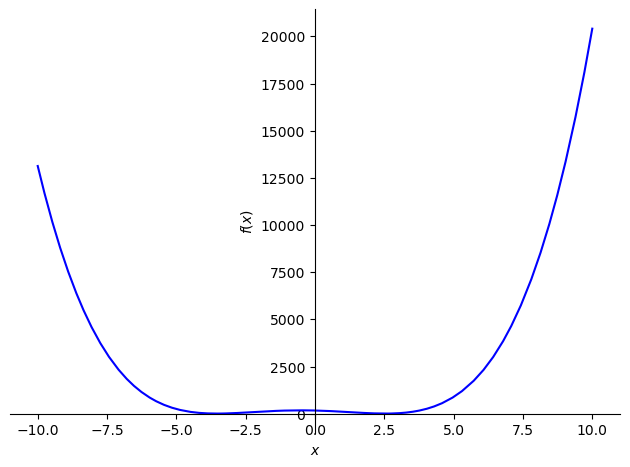

In [17]:
#Alínea 5
import sympy as sp
x1,x2=sp.symbols('x1 x2')
x=sp.symbols('x')
def f(x1,x2):
    return ((x1**2+x2-11)**2+(x1+x2**2-7)**2)
g1=sp.plot(f(x,x), (x,-10,10), show=False, line_color='blue')
g1.show()

# ============================================

### Exercício 5 

Considere a função $f(\mathbf{x}) = f(𝑥_1, x_2) = 𝑥_1^{2} + 3x_2^2 + x_2 + 5$ 

1. Construa a função $p(\mathbf{x})$ que define o plano tangente ao gráfico de $f(\mathbf{x})$ na vizinhança do ponto $\mathbf{a}=(1,1)$  pela formula:

$$p(\mathbf{x})=f(\mathbf{a})+\nabla f(\mathbf{a})^{T}(\mathbf{x}-\mathbf{a})$$

2. Esboce os gráficos de $f(\mathbf{x})$ e de $p(\mathbf{x})$.

In [18]:
#Alínea 1
x,x1,x2=sp.symbols('x x1 x2')
x=(x1,x2)
a=(1,1)

def f(x1,x2):
    return (x1**2+3*x2**2+x2+5)
    
def gradiente(x1,x2):
    return ([sp.diff(f(x1,x2),x1),sp.diff(f(x1,x2),x2)])

print(gradiente(x1,x2))

def gradiente_manual(x1,x2):
    return ([2*x1, 6*x2 + 1])

print(gradiente_manual(a[0],a[1]))
gradiente_f_ponto=sp.Matrix([[2], [7]])

def p(x1,x2):    
    return (f(a[0],a[1]) + (gradiente_f_ponto.T * sp.Matrix([x[0]-a[0], x[1]-a[1]]))[0])
    
print(p(x1,x2))

[2*x1, 6*x2 + 1]
[2, 7]
2*x1 + 7*x2 + 1


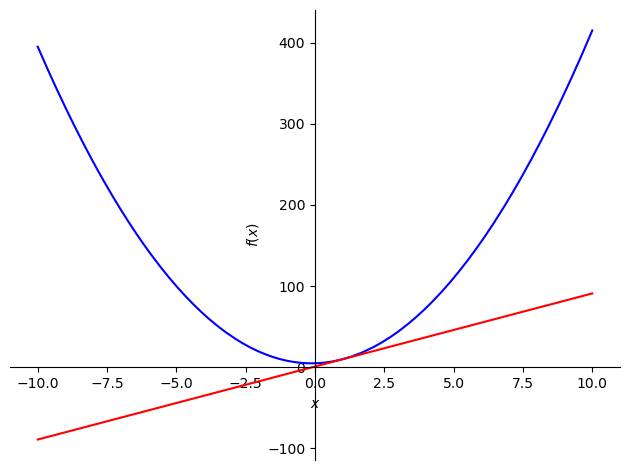

In [19]:
#Alínea 2
x,x1,x2=sp.symbols('x x1 x2')
def f(x1,x2):
    return (x1**2+3*x2**2+x2+5)
def p(x1,x2):
    return (2*x1 + 7*x2 + 1)
g1=sp.plot(f(x,x), show=False, line_color='blue')
g2=sp.plot(p(x,x), show=False, line_color='red')
g1.append(g2[0])
g1.show()

# %%%%%%%%%%%%%%%%%%%%%%%%

In [20]:
# Executar este código no final do trabalho:
import datetime
date = datetime.datetime.now()
print("FIM:  {:%d/%m/%Y %H:%M:%S\n}".format(date))

FIM:  20/04/2024 00:27:11



# %%%%%%%%%%%%%%%%%%%%%%%%